<a href="https://colab.research.google.com/github/Abrar171041075/Deep-Learning/blob/main/Custom_CNN%2BLeNet%2BVGG19%2BAlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore') # to ignore any warning you might see in the code

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing dataset
no_malaria = "/content/drive/MyDrive/kaggle_dataset/Dataset/Train/Uninfected" #uninfected as no_malaria
malaria = "/content/drive/MyDrive/kaggle_dataset/Dataset/Train/Parasite" #parasitized as malaria
image_size = 64  #pixel size per dimension

In [4]:
from tqdm import tqdm
import os  # used for IO operation like dealing with directories and files
import cv2  # this package for computer vision
import numpy as np
import matplotlib.pyplot as plt

m_data = [] 
label = []


In [5]:
# import, convert gray scale, and resize training set images for class 'messy':
for image in tqdm(os.listdir(no_malaria)): # listdir to list all files in that directory
    path = os.path.join(no_malaria, image) # folder of the parasitized sample images
    img = cv2.imread(path)  
    img = cv2.resize(img, (image_size, image_size))# resize the image size to 64 pixels * 64 pixels
    np_img=np.asarray(img) # convert it to numpy array for visualisations
    m_data.append(img)     # append the 'uninfected' images to the  main dataframe
    label.append(0)   #append '0' meaning no malaria
    
for image2 in tqdm(os.listdir(malaria)): 
    path = os.path.join(malaria, image2)# folder of the parasitized sample images
    img2 = cv2.imread(path) 
    img2 = cv2.resize(img2, (image_size, image_size)) # resize the image size to 64 pixels * 64 pixels 
    np_img2 =np.asarray(img2)
    m_data.append(img2)     # append the 'infected' images to the  main dataframe
    label.append(1)  #append '1' meaning  malaria


100%|██████████| 220/220 [00:00<00:00, 264.62it/s]


Text(0.5, 1.0, 'Infected malaria cells')

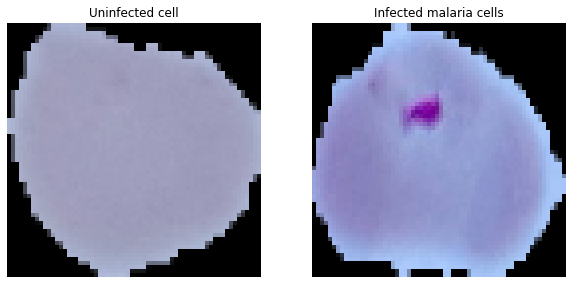

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img)
plt.axis('off')
plt.title("Uninfected cell")
plt.subplot(1, 2, 2)
plt.imshow(np_img2)
plt.axis('off')
plt.title("Infected malaria cells")

In [7]:
#dimension of ARRAY dataset (64, 64,3)
m_data = np.array(m_data)
m_data.shape

(416, 64, 64, 3)

In [8]:
#converting layers to categories and print shape
from tensorflow.keras.utils import to_categorical
label = to_categorical(np.array(label))
label.shape

(416, 2)

In [9]:
#train and test set split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(m_data, label, test_size=0.2, random_state=24)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#model building
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=2, activation='softmax')) #2 units for the two classes

#Model Compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
# using early stopping to control epochs by monitoring 'loss'
callbacks = EarlyStopping(monitor='loss', patience=3)

In [12]:
np.random.seed(24)
history = model.fit(X_train, y_train, batch_size = 24, verbose = 1, epochs = 6, validation_data = (X_test, y_test), callbacks = [callbacks])

Epoch 1/6
14/14 [==============================] - 6s 309ms/step - loss: 41.0977 - accuracy: 0.4759 - val_loss: 0.7960 - val_accuracy: 0.5476
Epoch 2/6
14/14 [==============================] - 4s 262ms/step - loss: 1.5387 - accuracy: 0.5030 - val_loss: 0.7641 - val_accuracy: 0.4762
Epoch 3/6
14/14 [==============================] - 3s 247ms/step - loss: 0.8827 - accuracy: 0.5572 - val_loss: 0.6947 - val_accuracy: 0.6071
Epoch 4/6
14/14 [==============================] - 4s 250ms/step - loss: 0.7811 - accuracy: 0.5422 - val_loss: 0.6642 - val_accuracy: 0.5952
Epoch 5/6
14/14 [==============================] - 4s 264ms/step - loss: 0.7298 - accuracy: 0.5572 - val_loss: 0.7016 - val_accuracy: 0.4524
Epoch 6/6
14/14 [==============================] - 2s 147ms/step - loss: 0.6948 - accuracy: 0.5783 - val_loss: 0.6824 - val_accuracy: 0.5119


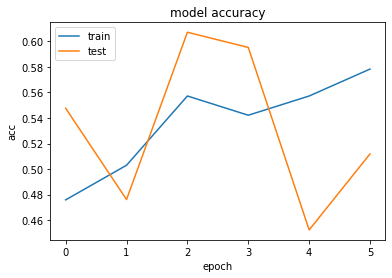

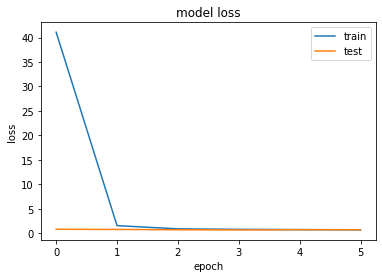

In [13]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

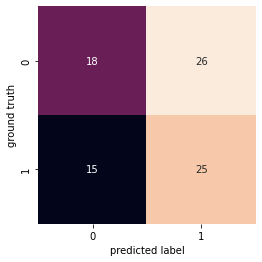

In [14]:
#confusion matrix:
from sklearn.metrics import confusion_matrix
import seaborn as sns

preds = model.predict(X_test) #gets the prediction prob
preds = preds.argmax(axis=1)
y_true = y_test.argmax(axis=1)
mat = confusion_matrix(y_true, preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('ground truth')
plt.show()

In [15]:
# classification report:
from sklearn.metrics import classification_report
y_true = y_test.argmax(axis=1)
print(classification_report(y_true,preds))

              precision    recall  f1-score   support

           0       0.55      0.41      0.47        44
           1       0.49      0.62      0.55        40

    accuracy                           0.51        84
   macro avg       0.52      0.52      0.51        84
weighted avg       0.52      0.51      0.51        84



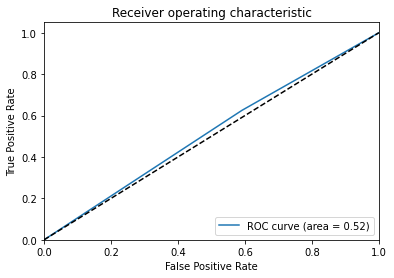

In [16]:
#ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, preds)
roc_auc = auc(fpr, tpr)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

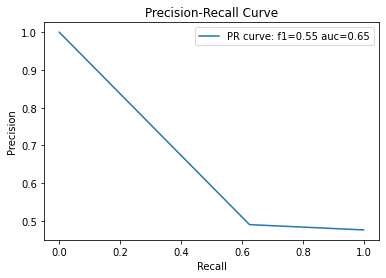

In [17]:
#pr curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

precision, recall, _ = precision_recall_curve(y_true, preds)
f1, auc = f1_score(y_true, preds), auc(recall, precision)

# plot the precision-recall curves
plt.plot(recall, precision, label='PR curve: f1=%.2f auc=%.2f' % (f1, auc))
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
# show the legend
plt.legend()
# show the plot
plt.show()

In [18]:
# #Parasite gray
# import os,cv2
# path = r'/content/drive/MyDrive/kaggle_dataset/Dataset/Train/Parasite' # Source Folder
# dstpath = r'/content/drive/MyDrive/kaggle_dataset/Dataset/Train/gray_parasite' # Destination Folder



# try:
#     makedirs(dstpath)
# except:
#     print ("Directory already exist, images will be written in asme folder")

# # Folder won't used
# files = os.listdir(path)

# for image in files:
#     img = cv2.imread(os.path.join(path,image))
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     cv2.imwrite(os.path.join(dstpath,image),gray)

In [19]:
# #uninfected gray
# import os,cv2
# path = r'/content/drive/MyDrive/kaggle_dataset/Dataset/Train/Uninfected' # Source Folder
# dstpath = r'/content/drive/MyDrive/kaggle_dataset/Dataset/Train/gray_uninfected' # Destination Folder



# try:
#     makedirs(dstpath)
# except:
#     print ("Directory already exist, images will be written in asme folder")

# # Folder won't used
# files = os.listdir(path)

# for image in files:
#     img = cv2.imread(os.path.join(path,image))
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     cv2.imwrite(os.path.join(dstpath,image),gray)

In [20]:
# #importing dataset
# no_malaria = "/content/drive/MyDrive/kaggle_dataset/Dataset/Train/gray_uninfected" #uninfected as no_malaria
# malaria = "/content/drive/MyDrive/kaggle_dataset/Dataset/Train/gray_parasite" #parasitized as malaria
# image_size = 28  #pixel size per dimension

In [21]:
# from tqdm import tqdm
# import os  # used for IO operation like dealing with directories and files
# import cv2  # this package for computer vision
# import numpy as np
# import matplotlib.pyplot as plt

# m_data = [] 
# label = []


In [22]:
# # import, convert gray scale, and resize training set images for class 'messy':
# for image in tqdm(os.listdir(no_malaria)): # listdir to list all files in that directory
#     path = os.path.join(no_malaria, image) # folder of the parasitized sample images
#     img = cv2.imread(path)  
#     img = cv2.resize(img, (image_size, image_size))# resize the image size to 64 pixels * 64 pixels
#     np_img=np.asarray(img) # convert it to numpy array for visualisations
#     m_data.append(img)     # append the 'uninfected' images to the  main dataframe
#     label.append(0)   #append '0' meaning no malaria
    
# for image2 in tqdm(os.listdir(malaria)): 
#     path = os.path.join(malaria, image2)# folder of the parasitized sample images
#     img2 = cv2.imread(path) 
#     img2 = cv2.resize(img2, (image_size, image_size)) # resize the image size to 64 pixels * 64 pixels 
#     np_img2 =np.asarray(img2)
#     m_data.append(img2)     # append the 'infected' images to the  main dataframe
#     label.append(1)  #append '1' meaning  malaria


In [23]:
# plt.figure(figsize=(10,10))
# plt.subplot(1, 2, 1)
# plt.imshow(np_img)
# plt.axis('off')
# plt.title("Uninfected cell")
# plt.subplot(1, 2, 2)
# plt.imshow(np_img2)
# plt.axis('off')
# plt.title("Infected malaria cells")

In [24]:
# m_data = np.array(m_data)
# m_data.shape

In [25]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(m_data, label, test_size=0.2, random_state=24)

# LeNet Architecture

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D, Dense, Conv2D, Flatten
from tensorflow.keras.models import Sequential

In [27]:
model1 = Sequential()

# Input Layer
model1.add(Conv2D(32, kernel_size = (5, 5), padding = "same", activation = "sigmoid", input_shape = (28, 28, 1)))
model1.add(AveragePooling2D(pool_size = (2, 2), strides = 2))  #neuron number define how many features will be feed into the layer

# 1st Hidden Layer
model1.add(Conv2D(64, kernel_size = (5, 5), activation = "sigmoid"))
model1.add(AveragePooling2D(pool_size = (2, 2), strides = 2))

# Flatten Layer
model1.add(Flatten())

#Connected Layer
model1.add(Dense(120, activation = "sigmoid"))
model1.add(Dense(84,  activation = "sigmoid"))
model1.add(Dense(2, activation = "softmax"))

In [28]:
# # #Model Compilation
# model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 64)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 120)              

In [29]:
# from tensorflow.keras.callbacks import EarlyStopping
# # using early stopping to control epochs by monitoring 'loss'
# callbacks = EarlyStopping(monitor='loss', patience=3)

In [30]:
# np.random.seed(24)
# history = model1.fit(X_train, y_train, batch_size = 24, verbose = 1, epochs = 6, validation_data = (X_test, y_test), callbacks = [callbacks])

# VGG19

In [31]:
#importing the VGG19 model weights
from tensorflow.keras.applications import VGG19

VGG19_model = VGG19(include_top=False, weights="imagenet", input_shape=(64, 64, 3))

In [32]:
#Setting trainable to false since you are not gonna retrain the model but will use its pretrained weights instead
VGG19_model.trainable = False

In [33]:
#Creating model on top
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout

inputs = Input(shape=(64, 64, 3))
x = VGG19_model(inputs, training=False)
x1 = GlobalAveragePooling2D()(x)
outputs = Dense(2, activation='softmax')(x1)
model_VGG19 = Model(inputs, outputs)
model_VGG19.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_7 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 20,025,410
Trainable params: 1,026
Non-trainable params: 20,024,384
_________________________________________________________________


In [34]:
from tensorflow.keras.optimizers import Adam

model_VGG19.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
np.random.seed(50)
history1 = model_VGG19.fit(X_train, y_train, batch_size = 64, verbose = 1, epochs = 5, validation_data = (X_test, y_test), callbacks = [callbacks])

Epoch 1/5
6/6 [==============================] - 20s 3s/step - loss: 2.2609 - accuracy: 0.7681 - val_loss: 1.6407 - val_accuracy: 0.8810
Epoch 2/5
6/6 [==============================] - 20s 3s/step - loss: 1.0580 - accuracy: 0.9187 - val_loss: 0.9604 - val_accuracy: 0.8810
Epoch 3/5
6/6 [==============================] - 22s 4s/step - loss: 0.6322 - accuracy: 0.9217 - val_loss: 0.4184 - val_accuracy: 0.9405
Epoch 4/5
6/6 [==============================] - 19s 3s/step - loss: 0.3850 - accuracy: 0.9729 - val_loss: 0.3792 - val_accuracy: 0.9524
Epoch 5/5
6/6 [==============================] - 19s 3s/step - loss: 0.2631 - accuracy: 0.9699 - val_loss: 0.3446 - val_accuracy: 0.9524


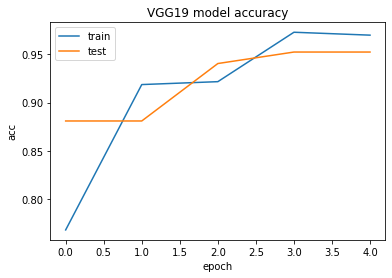

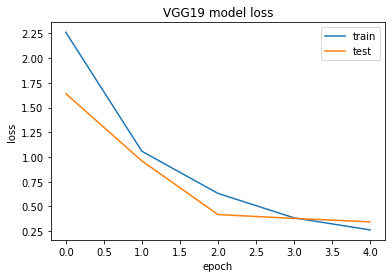

In [36]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('VGG19 model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('VGG19 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

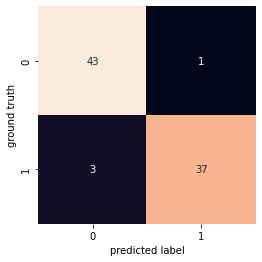

In [37]:
# plot confusion matrix:
from sklearn.metrics import confusion_matrix
import seaborn as sns

preds1 = model_VGG19.predict(X_test)
preds1 = preds1.argmax(axis=1)
y_true1 = y_test.argmax(axis=1)
mat = confusion_matrix(y_true1,preds1)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('ground truth')
plt.show()

In [38]:
# classification report:
from sklearn.metrics import classification_report

print(classification_report(y_true1,preds1))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.97      0.93      0.95        40

    accuracy                           0.95        84
   macro avg       0.95      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84



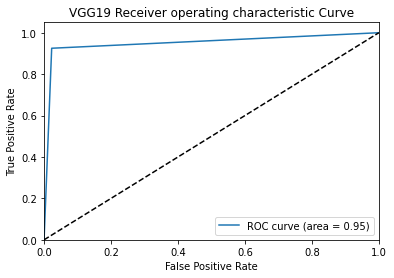

In [39]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true1, preds1)
roc_auc = auc(fpr, tpr)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('VGG19 Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

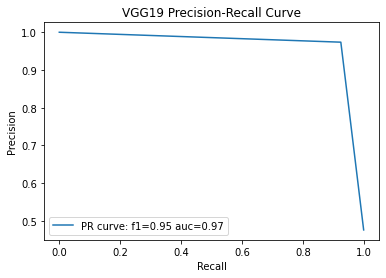

In [40]:
#pr curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

precision, recall, _ = precision_recall_curve(y_true1, preds1)
f1, auc = f1_score(y_true1, preds1), auc(recall, precision)

# plot the precision-recall curves
plt.plot(recall, precision, label='PR curve: f1=%.2f auc=%.2f' % (f1, auc))
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('VGG19 Precision-Recall Curve')
# show the legend
plt.legend()
# show the plot
plt.show()

CNN fine tuning

In [41]:
import tensorflow as tf
from tensorflow import keras

In [42]:
!pip install -q -U keras-tuner

In [43]:
import keras_tuner as kt

In [44]:
from tensorflow.keras.optimizers import Adam
# building the model and compiling it with the parameters to 
#optimise and search through using: 
# hp.choice('units', [8,16,32])
# hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])

def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Choice('filters', [8, 16, 32]), kernel_size=(3, 3), 
                     input_shape=(64, 64, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(units=512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=2, activation='softmax'))
    
    hp_lR = hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])
    model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(learning_rate = hp_lR), metrics=['accuracy'])
    return model

In [45]:
#using HYPERBAND from keras_tuner
tuner = kt.Hyperband(hypermodel= build_model, objective="val_accuracy", factor = 3, overwrite = True, max_epochs=6)

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=3)

In [47]:
# starting the search
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks =[callback])
best_model = tuner.get_best_hyperparameters(num_trials=3)[0]

Trial 10 Complete [00h 00m 12s]
val_accuracy: 0.5952380895614624

Best val_accuracy So Far: 0.5952380895614624
Total elapsed time: 00h 01m 47s


In [48]:
# fitting tuned model
model_tuned = tuner.hypermodel.build(best_model)
history3 = model_tuned.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, callbacks=[callbacks])

Epoch 1/20
6/6 [==============================] - 2s 205ms/step - loss: 16.3707 - accuracy: 0.5452 - val_loss: 3.1081 - val_accuracy: 0.5476
Epoch 2/20
6/6 [==============================] - 1s 227ms/step - loss: 13.0700 - accuracy: 0.4819 - val_loss: 1.7085 - val_accuracy: 0.4405
Epoch 3/20
6/6 [==============================] - 1s 209ms/step - loss: 7.1649 - accuracy: 0.5000 - val_loss: 1.7671 - val_accuracy: 0.4881
Epoch 4/20
6/6 [==============================] - 1s 170ms/step - loss: 6.4632 - accuracy: 0.4669 - val_loss: 0.7461 - val_accuracy: 0.5714
Epoch 5/20
6/6 [==============================] - 1s 173ms/step - loss: 5.2623 - accuracy: 0.5000 - val_loss: 0.6778 - val_accuracy: 0.5357
Epoch 6/20
6/6 [==============================] - 1s 172ms/step - loss: 5.0892 - accuracy: 0.4789 - val_loss: 1.0963 - val_accuracy: 0.4643
Epoch 7/20
6/6 [==============================] - 1s 167ms/step - loss: 3.6381 - accuracy: 0.5120 - val_loss: 0.8402 - val_accuracy: 0.4762
Epoch 8/20
6/6 [==

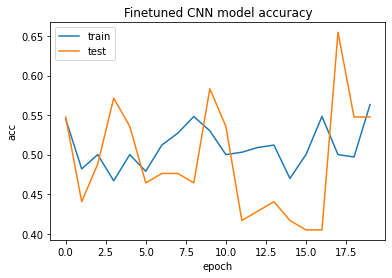

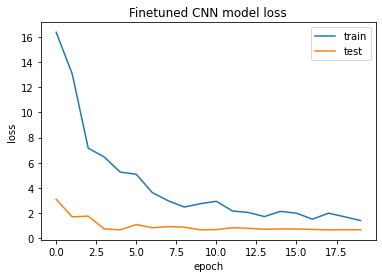

In [49]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Finetuned CNN model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Finetuned CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

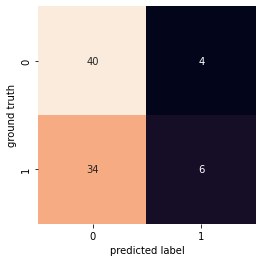

In [50]:
# plot confusion matrix:
from sklearn.metrics import confusion_matrix
import seaborn as sns

preds3 = model_tuned.predict(X_test)
preds3 = preds3.argmax(axis=1)
y_true3 = y_test.argmax(axis=1)
mat = confusion_matrix(y_true3, preds3)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('ground truth')
plt.show()

In [51]:
# classification report:
from sklearn.metrics import classification_report

print(classification_report(y_true3,preds3))

              precision    recall  f1-score   support

           0       0.54      0.91      0.68        44
           1       0.60      0.15      0.24        40

    accuracy                           0.55        84
   macro avg       0.57      0.53      0.46        84
weighted avg       0.57      0.55      0.47        84



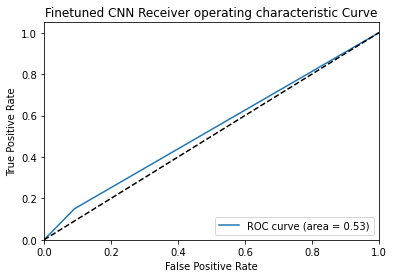

In [52]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true3, preds3)
roc_auc = auc(fpr, tpr)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Finetuned CNN Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

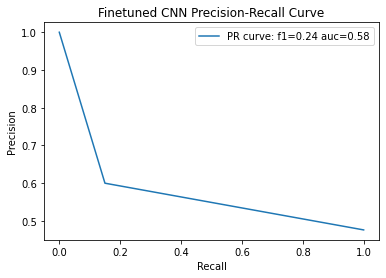

In [53]:
#pr curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

precision, recall, _ = precision_recall_curve(y_true3, preds3)
f1, auc = f1_score(y_true3, preds3), auc(recall, precision)

# plot the precision-recall curves
plt.plot(recall, precision, label='PR curve: f1=%.2f auc=%.2f' % (f1, auc))
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Finetuned CNN Precision-Recall Curve')
# show the legend
plt.legend()
# show the plot
plt.show()

# AlexNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Dense, Conv2D, Flatten
from tensorflow.keras.models import Sequential

In [58]:
model2 = Sequential()

# Input Layer
model2.add(Conv2D(32, kernel_size = (11,11), strides = 4, activation = "relu", input_shape = (224, 224, 3)))
model2.add(MaxPooling2D(pool_size = (3, 3), strides = 2))  #neuron number define how many features will be feed into the layer

# Hidden Layer
model2.add(Conv2D(64, kernel_size = (5, 5),padding = "same", activation = "relu"))
model2.add(MaxPooling2D(pool_size = (3, 3), strides = 2))

model2.add(Conv2D(128, kernel_size = (3, 3),padding = "valid", activation = "relu"))
model2.add(Conv2D(128, kernel_size = (3, 3),padding = "valid" ,activation = "relu"))
model2.add(Conv2D(128, kernel_size = (3, 3),padding = "valid" ,activation = "relu"))
model2.add(MaxPooling2D(pool_size = (3, 3), strides = 2))


# Flatten Layer
model2.add(Flatten())

#Connected Layer
model2.add(Dense(4096, activation = "relu"))
model2.add(Dense(4096,  activation = "relu"))
model2.add(Dense(2, activation = "softmax"))

In [60]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 54, 54, 32)        11648     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 64)        51264     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 128)        